**This notebook deals with visualisation of the massive GFW dataset, using Kepler.gl and DataShader.**

### Imports and Setup

In [0]:
#downloading GFW-centroids data from drive.
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gv3wF-RcmJsCHBN2hIdp7zvApNnrDEt2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1gv3wF-RcmJsCHBN2hIdp7zvApNnrDEt2" -O "GFW.csv" && rm -rf /tmp/cookies.txt

In [0]:
#install dependencies here
!pip install datashader

In [0]:
import dask.dataframe as dd
import pandas as pd
from dask.diagnostics import ProgressBar
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Hot, viridis, inferno

### Main

In [74]:
#read data from runtime
df = dd.read_csv("GFW.csv")
df.head()

,Unnamed: 0,date,lat_bin,lon_bin,mmsi,fishing_hours,lat_centroid,lon_centroid
0,0,2012-01-01 00:00:00 UTC,-46.1,-60.7,416755000,2.457917,-46.05,-60.65
1,1,2012-01-01 00:00:00 UTC,-46.1,-60.7,440548000,2.400417,-46.05,-60.65
2,2,2012-01-01 00:00:00 UTC,-46.0,-60.7,440548000,1.614444,-45.95,-60.65
3,3,2012-01-01 00:00:00 UTC,-46.0,-60.7,416032500,11.497083,-45.95,-60.65
4,4,2012-01-01 00:00:00 UTC,-45.9,-60.7,416842000,11.521944,-45.85,-60.65


#### Plotting GFW Centroids using DataShader


---


Selecting a nice looking color map. Then plot all points on a canvas. 

[########################################] | 100% Completed |  1min  5.3s


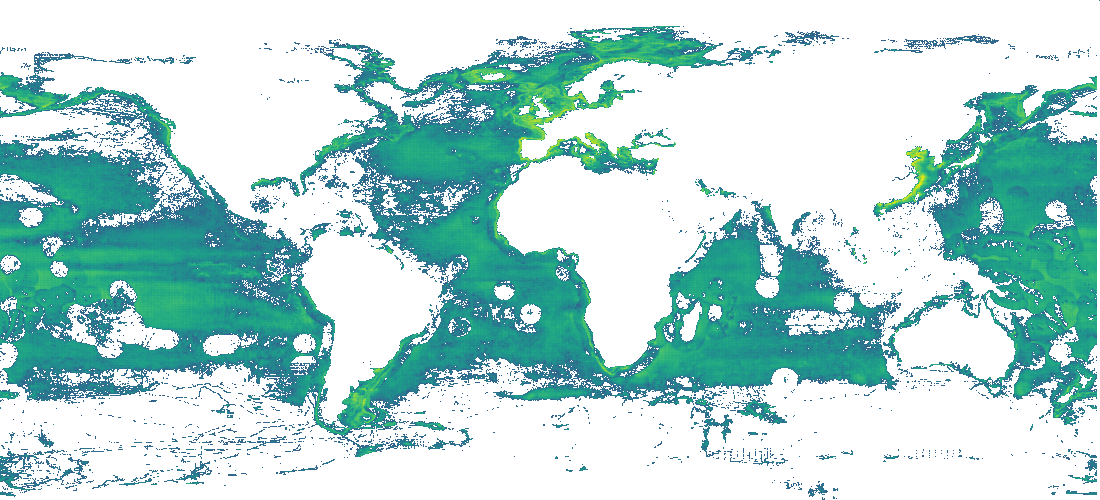

In [77]:
background = "black"
export = partial(export_image, background = background)
cm = partial(colormap_select, reverse=(background!="black"))
cvs = ds.Canvas(plot_width=1100, plot_height=500)

#uncomment for debuggin with smaller dataset
# df = df.get_partition(0)

with ProgressBar():
  
  agg = cvs.points(df, 'lon_centroid', 'lat_centroid')
  plot = tf.shade(agg, cmap=cm(viridis,0.3), how='log')

plot

In [0]:
export(plot, "GFW_centroids_plot")

#### Aggregating Data by Location


---

*   After aggregating data by location, we export GFW_processed.csv and plot it on Kepler.
*   You could also do the same using Kepler Jupyter Plugin if you are not using colab.



In [27]:
df = df.groupby(["lat_centroid", "lon_centroid"]).agg({"date":"count"})
with ProgressBar():
  df = df.compute()

df = df.reset_index()
df.rename(columns={"lat_centroid":"latitude", "lon_centroid":"longitude", "date":"intensity"}, inplace=True)

print("Data Size: {}".format(df.shape[0]))
df.to_csv("GFW_processed.csv", index=False)
df.head()

[########################################] | 100% Completed |  2min  8.5s


Here's how it looks after plotting the data in Kepler. I've uploaded the png and rendered it here.

![picture](https://drive.google.com/uc?export=view&id=1tTF2vpDTn_3hgmnNo1TUiK0s0RCtfKqN)